# **Fourier Graphical Researching**

**RELEASE**

In [1]:
REL = '_R004'

## **Importing libraries and connecting disk, global ads**

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Collecting own modules

In [3]:
import sys
sys.path.append('/gdrive/My Drive/Release')
import Modules.global_f as mgf

Importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
from google.colab import files

pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings("ignore")

Data directories paths

In [5]:
DATA_PATH = '/gdrive/My Drive/Data/'
INDEXES_PATH = '/gdrive/My Drive/Data/Raw_data/Indexes/'
BRANCHES_PATH = '/gdrive/My Drive/Data//Raw_data/Branches/'

In [6]:
df_norm = pd.read_csv(DATA_PATH + 'Data_Cleaner_!!norm_cl!!_R004.csv')

##**Task implementation**

 **Fourier transformations**

In [7]:
pd.set_option('display.float_format', None)

fft_df = pd.DataFrame()
for k in df_norm.columns[1:]:
  close_fft = np.fft.fft(np.asarray(df_norm[k].tolist()))
  fft_df_temp = pd.DataFrame({'fft':close_fft})
  fft_df['fft_'+k] = fft_df_temp['fft'].apply(lambda x: x)
  fft_df['abs_'+k] = fft_df_temp['fft'].apply(lambda x: np.abs(x))
  fft_df['ang_'+k] = fft_df_temp['fft'].apply(lambda x: np.angle(x))
fft_df.head(n=20)

,fft_price,abs_price,ang_price,fft_Open,abs_Open,ang_Open,fft_Max,abs_Max,ang_Max,fft_Min,abs_Min,ang_Min,fft_change %,abs_change %,ang_change %,fft_ma7,abs_ma7,ang_ma7,fft_ma14,abs_ma14,ang_ma14,fft_ma21,abs_ma21,ang_ma21,fft_26ema,abs_26ema,ang_26ema,fft_12ema,abs_12ema,ang_12ema,fft_MACD,abs_MACD,ang_MACD,fft_20sd,abs_20sd,ang_20sd,fft_upper_band,abs_upper_band,ang_upper_band,fft_lower_band,abs_lower_band,ang_lower_band,fft_ema,abs_ema,ang_ema,fft_wma,abs_wma,ang_wma,fft_KAMA,abs_KAMA,ang_KAMA,fft_DEMA,abs_DEMA,ang_DEMA,fft_momentum,abs_momentum,ang_momentum,fft_log_momentum,abs_log_momentum,ang_log_momentum,fft_RSI,abs_RSI,ang_RSI,fft_Stochk,abs_Stochk,ang_Stochk,fft_Stochd,abs_Stochd,ang_Stochd,fft_Stoch RSId,abs_Stoch RSId,ang_Stoch RSId,fft_ADX,abs_ADX,ang_ADX,fft_ADXR,abs_ADXR,ang_ADXR,fft_DX,abs_DX,ang_DX,fft_WillR,abs_WillR,ang_WillR,fft_CCI,abs_CCI,ang_CCI,fft_ATR,abs_ATR,ang_ATR,fft_NATR,abs_NATR,ang_NATR,fft_ULTOSC,abs_ULTOSC,ang_ULTOSC,fft_ROC,abs_ROC,ang_ROC,fft_BOP,abs_BOP,ang_BOP,fft_AroonOSC,abs_AroonOSC,ang_AroonOSC,fft_APO,abs_APO,ang_APO,fft_PPO,abs_PPO,ang_PPO,fft_CMO,abs_CMO,ang_CMO,fft_ifft_3,abs_ifft_3,ang_ifft_3,fft_ifft_6,abs_ifft_6,ang_ifft_6,fft_ifft_9,abs_ifft_9,ang_ifft_9,fft_ifft_100,abs_ifft_100,ang_ifft_100,fft_dow-jones,abs_dow-jones,ang_dow-jones,fft_s-p-500,abs_s-p-500,ang_s-p-500,fft_dax,abs_dax,ang_dax,fft_nasdaq-composite,abs_nasdaq-composite,ang_nasdaq-composite,fft_ftse-100,abs_ftse-100,ang_ftse-100,fft_cac-40,abs_cac-40,ang_cac-40,fft_nikkei-225,abs_nikkei-225,ang_nikkei-225,fft_sse-composite,abs_sse-composite,ang_sse-composite,fft_hang-seng,abs_hang-seng,ang_hang-seng,fft_kospi,abs_kospi,ang_kospi,fft_bse-sensex,abs_bse-sensex,ang_bse-sensex,fft_bovespa,abs_bovespa,ang_bovespa,fft_merval,abs_merval,ang_merval,fft_vix-index,abs_vix-index,ang_vix-index,fft_индекс-мосбиржи,abs_индекс-мосбиржи,ang_индекс-мосбиржи,fft_bitcoin,abs_bitcoin,ang_bitcoin,fft_ifx-cbonds,abs_ifx-cbonds,ang_ifx-cbonds,fft_ртс,abs_ртс,ang_ртс,fft_нефть-brent,abs_нефть-brent,ang_нефть-brent,fft_msci-world-index,abs_msci-world-index,ang_msci-world-index,fft_s-p_tsx-composite,abs_s-p_tsx-composite,ang_s-p_tsx-composite,fft_asx-200,abs_asx-200,ang_asx-200,fft_kase-(казахстан),abs_kase-(казахстан),ang_kase-(казахстан),fft_ux-(украина),abs_ux-(украина),ang_ux-(украина),fft_золото-(лондон),abs_золото-(лондон),ang_золото-(лондон),fft_серебро-(лондон),abs_серебро-(лондон),ang_серебро-(лондон),fft_платина-(лондон),abs_платина-(лондон),ang_платина-(лондон),fft_палладий-(лондон),abs_палладий-(лондон),ang_палладий-(лондон),fft_LIBOR USD,abs_LIBOR USD,ang_LIBOR USD,fft_LIBOR EUR,abs_LIBOR EUR,ang_LIBOR EUR,fft_LIBOR GBP,abs_LIBOR GBP,ang_LIBOR GBP,fft_LIBOR CHF,abs_LIBOR CHF,ang_LIBOR CHF,fft_LIBOR JPY,abs_LIBOR JPY,ang_LIBOR JPY,fft_morgan-stanley-nyse,abs_morgan-stanley-nyse,ang_morgan-stanley-nyse,fft_GBP_USD,abs_GBP_USD,ang_GBP_USD,fft_USD_JPY,abs_USD_JPY,ang_USD_JPY,fft_Dow Jones Basic Materials,abs_Dow Jones Basic Materials,ang_Dow Jones Basic Materials,fft_Dow Jones Consumer Goods,abs_Dow Jones Consumer Goods,ang_Dow Jones Consumer Goods,fft_Dow Jones Consumer Services,abs_Dow Jones Consumer Services,ang_Dow Jones Consumer Services,fft_Dow Jones Financials,abs_Dow Jones Financials,ang_Dow Jones Financials,fft_Dow Jones Health Care,abs_Dow Jones Health Care,ang_Dow Jones Health Care,fft_Dow Jones Industrials,abs_Dow Jones Industrials,ang_Dow Jones Industrials,fft_Dow Jones Oil & Gas,abs_Dow Jones Oil & Gas,ang_Dow Jones Oil & Gas,fft_Dow Jones Technology,abs_Dow Jones Technology,ang_Dow Jones Technology,fft_Dow Jones Telecommunications,abs_Dow Jones Telecommunications,ang_Dow Jones Telecommunications,fft_Dow Jones Utilities,abs_Dow Jones Utilities,ang_Dow Jones Utilities,fft_NYSE Energy,abs_NYSE Energy,ang_NYSE Energy,fft_NYSE Financials,abs_NYSE Financials,ang_NYSE Financials,fft_NYSE Healthcare,abs_NYSE Healthcare,ang_NYSE Healthcare,fft_NYSE TMT,abs_NYSE TMT,ang_NYSE TMT,fft_Philadelphia Semiconductor Index,abs_Phil

Graphical representations of Fourier transforms

In [8]:
idx_keys = ['Date', 'dow-jones', 's-p-500', 'dax', 'nasdaq-composite',
            'ftse-100', 'cac-40', 'nikkei-225', 'sse-composite',
            'hang-seng', 'kospi', 'bse-sensex', 'bovespa',
            'merval', 'vix-index', 'msci-world-index',
            's-p_tsx-composite', 'morgan-stanley-nyse', 'NYSE  Composite',
            'индекс-мосбиржи', 'ifx-cbonds', 'ртс', 
            'нефть-brent', 'kase-(казахстан)', 'ux-(украина)']
df_idx_keys = df_norm[idx_keys]
df_idx_keys.shape

(2023, 25)

In [9]:
pay_keys = ['Date', 'bitcoin',  'LIBOR USD', 'LIBOR EUR', 'LIBOR GBP', 
            'LIBOR CHF', 'LIBOR JPY', 'GBP_USD', 'USD_JPY', 
            'золото-(лондон)', 'серебро-(лондон)', 'платина-(лондон)', 
            'палладий-(лондон)']
df_pay_keys = df_norm[pay_keys]
df_pay_keys.shape

(2023, 13)

In [10]:
branch_keys = ['Date', 'Dow Jones Basic Materials', 'Dow Jones Consumer Goods',
               'Dow Jones Consumer Services', 'Dow Jones Financials',
               'Dow Jones Health Care', 'Dow Jones Industrials',
               'Dow Jones Oil & Gas', 'Dow Jones Technology',
               'Dow Jones Telecommunications', 'Dow Jones Utilities',
               'NYSE Energy', 'NYSE Financials', 'NYSE Healthcare',
               'NYSE TMT', 'Philadelphia Semiconductor Index',
               'NASDAQ Bank', 'NASDAQ Biotechnology', 'NASDAQ Computer',
               'NASDAQ Financial 100', 'NASDAQ Health Care',
               'NASDAQ Industrial', 'NASDAQ Insurance',
               'NASDAQ Internet', 'NASDAQ Other Finance',
               'NASDAQ Telecommunications', 'NASDAQ Transportation',
               'S&P 500 Utilities', 'S&P 500 Consumer Discretionary',
               'S&P 500 Consumer Staples', 'S&P 500 Energy',
               'S&P 500 Financials', 'S&P 500 Health Care',
               'S&P 500 Industrials', 'S&P 500 Information Technology',
               'S&P 500 Materials', 'S&P 500 Real Estate',
               'S&P 500 Telecom Services', 'NYSE  Composite']
df_branch_keys = df_norm[branch_keys]
df_branch_keys.shape

(2023, 39)

In [11]:
df_idx_keys

,Date,dow-jones,s-p-500,dax,nasdaq-composite,ftse-100,cac-40,nikkei-225,sse-composite,hang-seng,kospi,bse-sensex,bovespa,merval,vix-index,msci-world-index,s-p_tsx-composite,morgan-stanley-nyse,NYSE Composite,индекс-мосбиржи,ifx-cbonds,ртс,нефть-brent,kase-(казахстан),ux-(украина)
0,2011-04-07,0.075780,0.074561,0.218859,0.038943,0.373745,0.374410,0.059235,0.332527,0.475130,0.379422,0.120894,0.360633,0.025044,0.108846,0.154483,0.375373,0.209147,0.195122,0.257992,0.000000,0.977233,0.962915,0.439674,1.000000
1,2011-04-08,0.074460,0.072690,0.221029,0.037595,0.390756,0.384504,0.067285,0.339426,0.481890,0.382750,0.117069,0.355394,0.025492,0.119174,0.158041,0.388270,0.203988,0.194527,0.262940,0.000284,1.000000,1.000000,0.443153,0.993781
2,2011-04-11,0.074507,0.071390,0.220601,0.036831,0.389944,0.377533,0.065087,0.337075,0.476389,0.379564,0.111897,0.349058,0.024887,0.101780,0.156453,0.361164,0.199247,0.190311,0.258608,0.000969,0.993305,0.975121,0.440854,0.982853
3,2011-04-13,0.069568,0.067867,0.217917,0.035975,0.374824,0.367781,0.061518,0.345683,0.466448,0.379296,0.123787,0.329865,0.024120,0.106264,0.150804,0.340252,0.197574,0.181643,0.243326,0.001064,0.959141,0.964871,0.437071,0.974819
4,2011-04-20,0.077756,0.073457,0.222573,0.039489,0.378980,0.367298,0.059957,0.332433,0.452313,0.406698,0.117603,0.336408,0.024245,0.081125,0.157349,0.348431,0.187117,0.191623,0.232082,0.001963,0.938073,0.973910,0.414831,0.974065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,2021-03-15,0.997223,0.998185,0.967629,0.953026,0.634761,0.977393,0.976131,0.461972,0.744416,0.906769,0.964172,0.883041,0.906784,0.148526,0.993003,0.996368,0.993307,1.000000,0.997730,0.993433,0.612367,0.461703,0.955113,0.548730
2019,2021-03-16,0.991504,0.996001,0.977539,0.954043,0.653717,0.983238,0.983135,0.470391,0.755888,0.919022,0.963320,0.873525,0.891560,0.145264,0.997181,0.986023,0.974902,0.988268,1.000000,0.991275,0.618266,0.457138,0.965223,0.547558
2020,2021-03-17,1.000000,1.000000,0.981562,0.958640,0.639321,0.983055,0.982828,0.470019,0.756269,0.907791,0.947926,0.902470,0.896619,0.137655,0.998231,1.000000,0.993307,0.995101,0.965176,0.991159,0.578704,0.453504,0.968783,0.547558
2021,2021-03-18,0.993134,0.979442,1.000000,0.923578,0.645302,0.985449,0.996572,0.475524,0.778252,0.918360,0.931908,0.882866,0.871909,0.169588,1.000000,0.981214,0.994423,0.979406,0.963875,0.989077,0.575400,0.409523,0.982792,0.552885


Options for graphs by the number of components

In [12]:
list_copm_fft = [3, 6, 9, 100]
plot_list = ['ma7', 'ma21', 'ema']
#import matplotlib.ticker as ticker

In [13]:
mgf.print_norm_fourier(df_idx_keys, 3, 40, 100, list_copm_fft, plot_list)

Output hidden; open in https://colab.research.google.com to view.

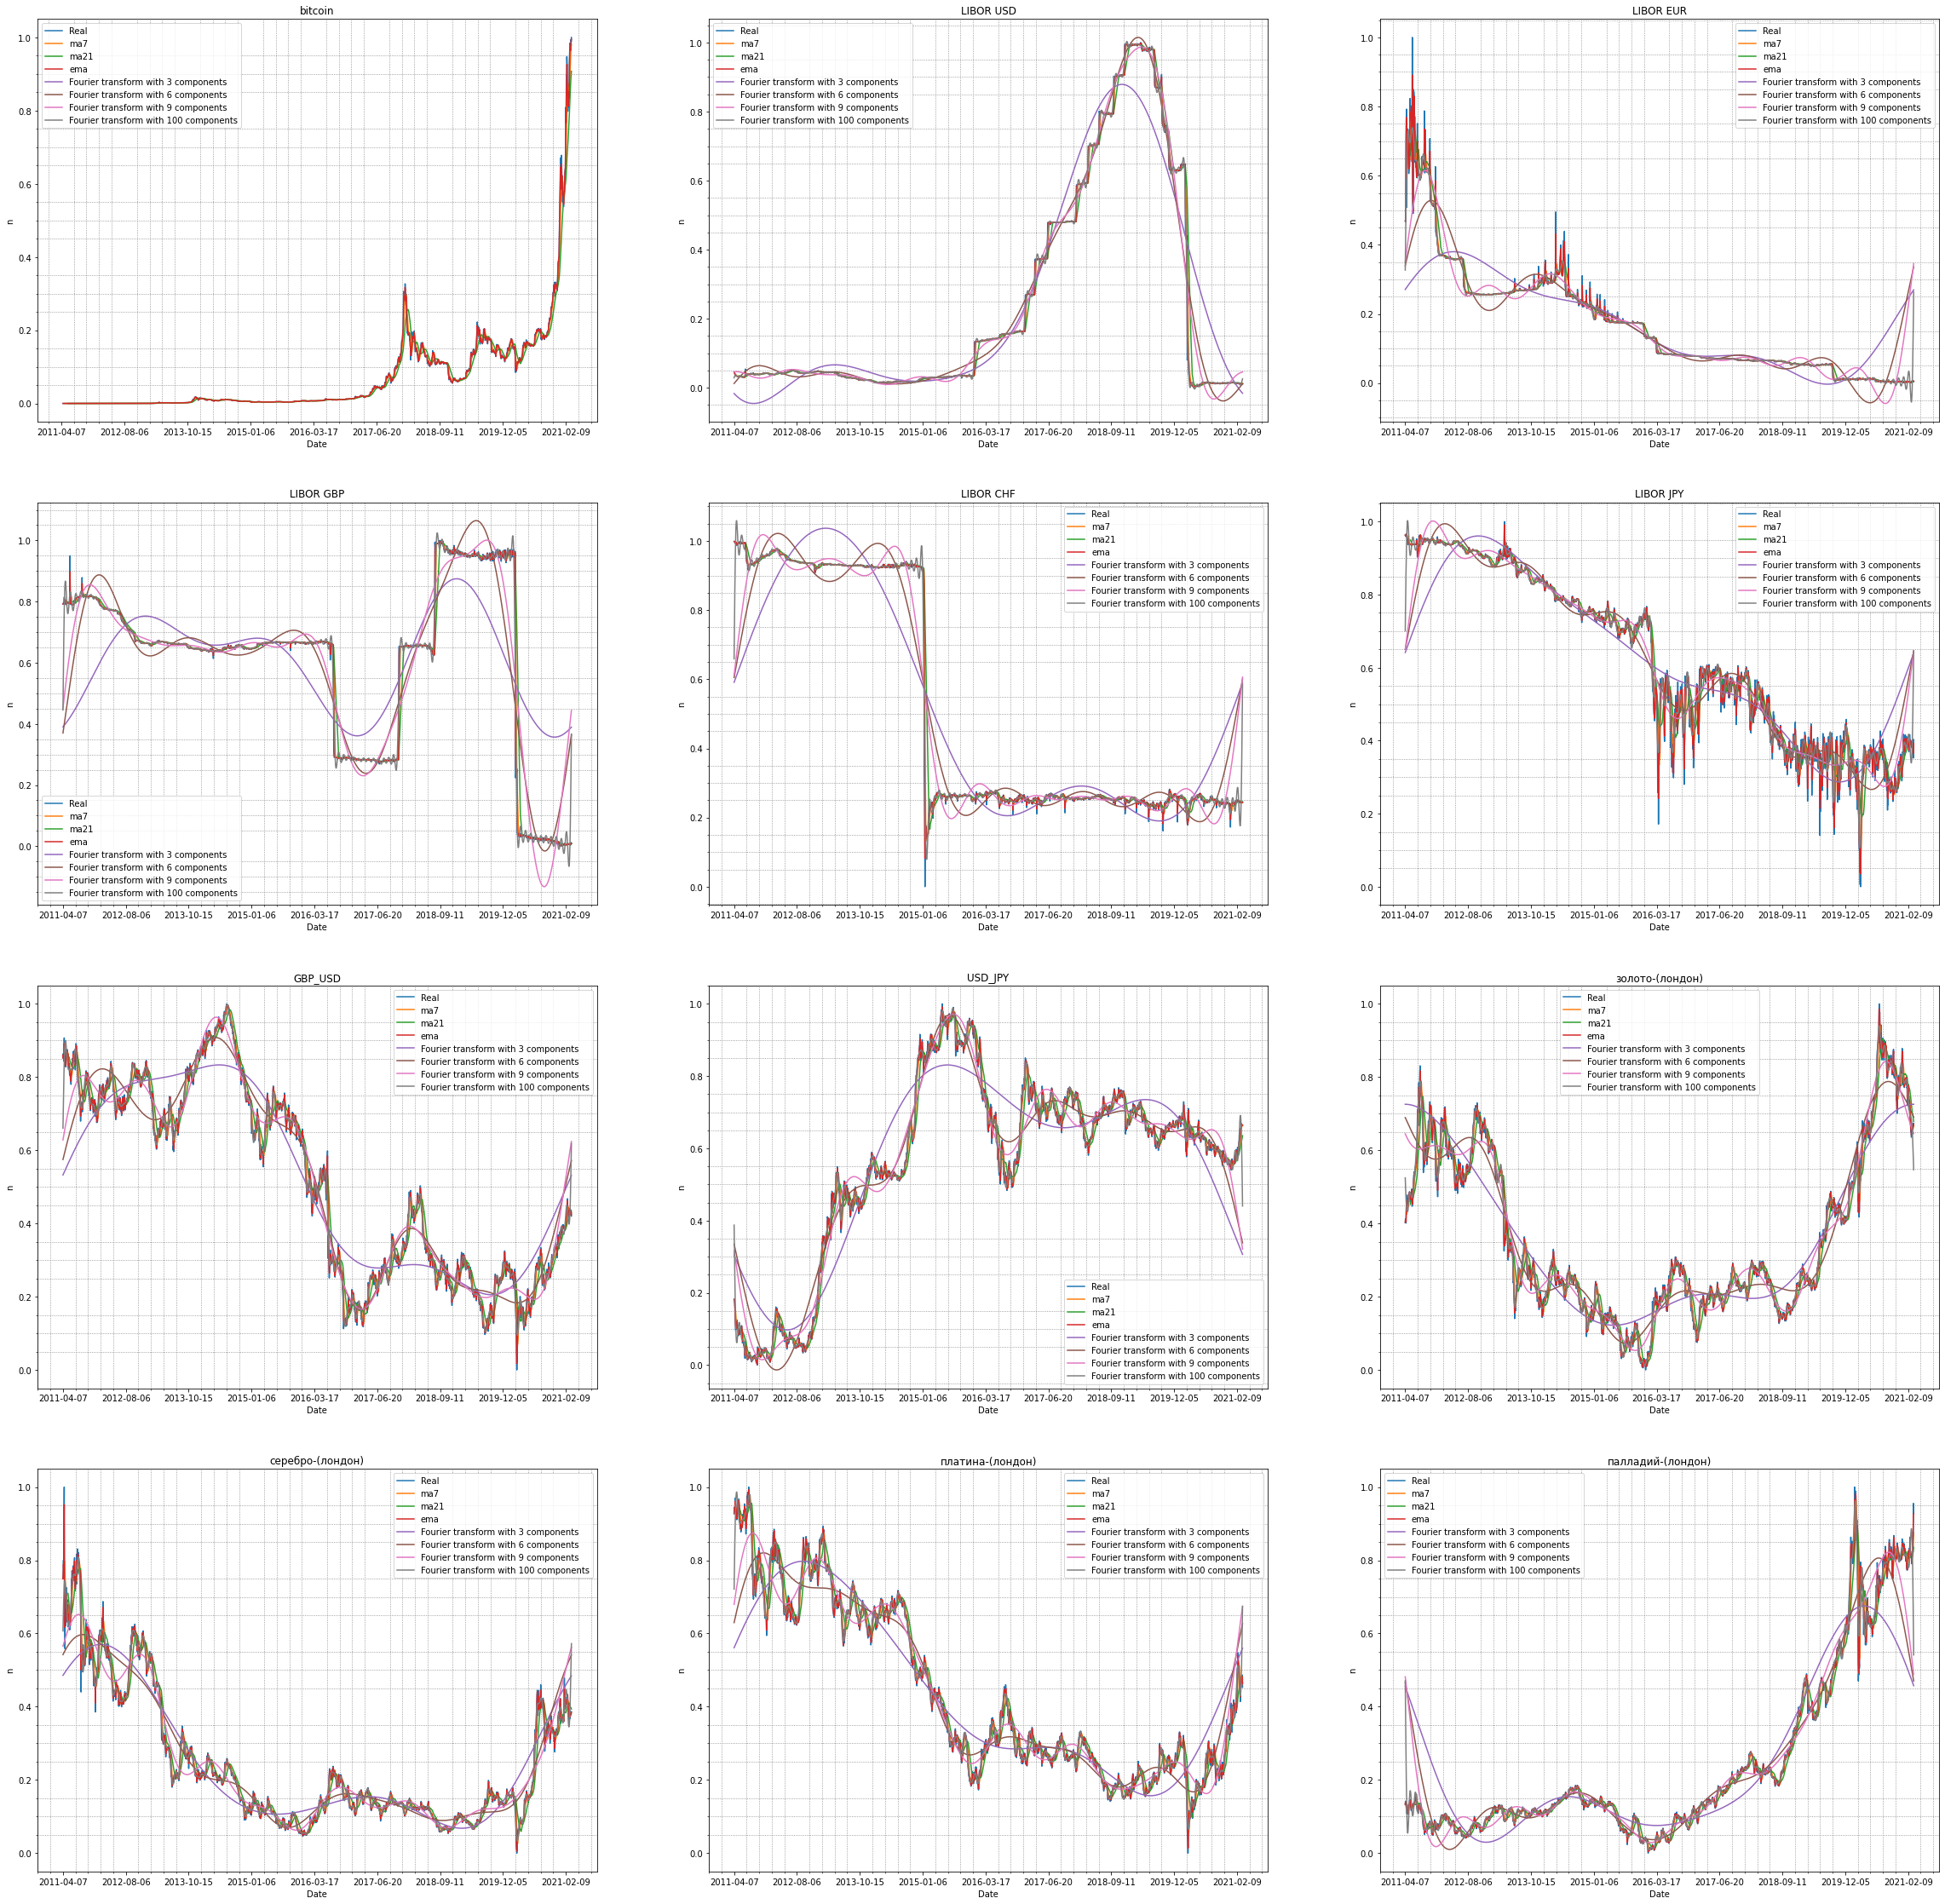

In [14]:
mgf.print_norm_fourier(df_pay_keys, 3, 40, 40,  list_copm_fft, plot_list)

In [15]:
mgf.print_norm_fourier(df_branch_keys, 3,  30, 100, list_copm_fft, plot_list)

Output hidden; open in https://colab.research.google.com to view.